### Data Cleaning and Exploratory Analysis 

In machine learning, you clean up the data and turn raw data into features from which you can derive the pattern. There are methods available to extract features that will be covered in upcoming sessions but it's very important to build the intuition. The process of data cleaning and visualization helps with that. In this assignment, we will try to manually identify the important features in the given dataset. 

### Dataset: Lending Club data

https://www.lendingclub.com/info/download-data.action

Years of data to download: 2007-2011

Load the Lending Club data into a pandas dataframe. The data contains 42538 rows and 145 columns. Not all these columns contain meaningful (or any) information so they need to be cleaned. The loans are categorized into different grades and sub-grades. It would be interesting to see whether they have any impact on the interest rates or not.
The process should lead us into default prediction, and finding the columns that directly predict how the loan will behave. These would be our most important features.

Here are the broad guidelines:

    View the data 
    Find the columns that are useful (may be null columns) and the ones that are not 
    Delete the columns that are not needed
    Clean columns values like int_rate and term by removing the string part and convert the column to numeric.
    Identify the columns containing useful information, they would be the features. 
    Visualize the important features


===============================================================================================

Purpose of Analysis
=================
- Seeing raw Lending Club data
- Cleaning Dataset 
- Dealing with missing values
- Extracting important features
- Finding dependency of loan over different features

In [1]:
import pandas as pd
import numpy as np

Importing data sample 
====================
- importing dataset and analysing raw dataset

In [2]:
loan_df = pd.read_csv('LoanStats3a.csv')
loan_df.shape

c:\users\punitha.hs\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(42542, 145)

In [3]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
loan_df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,...,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,0.0,42535.000000,42506.000000,42506.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,160.000000,160.000000,160.000000
mean,NaN,11089.722581,10821.585753,10139.938785,322.623063,6.913656e+04,NaN,13.373043,0.152449,1.081424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4271.925000,49.902375,1.262500
std,NaN,7410.938391,7146.914675,7131.598014,208.927216,6.409635e+04,NaN,6.726315,0.512406,1.527455,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3119.502707,15.565995,4.142869
min,NaN,500.000000,500.000000,0.000000,15.670000,1.896000e+03,NaN,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,193.290000,10.690000,0.000000
25%,NaN,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,NaN,8.200000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1842.750000,40.000000,0.000000
50%,NaN,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,NaN,13.470000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3499.350000,49.970000,0.000000
75%,NaN,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,NaN,18.680000,0.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5701.100000,60.652500,0.000000
max,NaN,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,NaN,29.990000,13.000000,33.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14798.200000,92.740000,24.000000


Data Cleaning
===============
### Any feature with more than 40000 rows null cannot be accounted for analysis so dropping them

In [5]:
total_na_per_col = loan_df.isnull().sum() > 40000 # Any feature having more than 40000 nulls is not useful as filling may cause erront values

In [6]:
total_na_per_col = pd.DataFrame(total_na_per_col).reset_index()
total_na_per_col.rename(columns={'index':'col',0:'tf'},inplace=True)

In [7]:
na_filter = total_na_per_col[total_na_per_col.tf == True]

In [8]:
na_filter = list(na_filter['col'])

In [9]:
na_filter

['id',
 'member_id',
 'url',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',
 'pct_tl_nvr_dlq',
 'percent_bc_gt_75',
 

In [10]:
for i in na_filter:
        loan_df.drop(i,inplace=True,axis=1)    

In [11]:
print(loan_df.shape)
loan_df.describe()

(42542, 57)


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42506.000000,15609.000000,3651.000000,...,42535.000000,42535.000000,42535.000000,42390.0,42535.0,42506.000000,42390.0,42506.000000,41170.000000,42430.000000
mean,11089.722581,10821.585753,10139.938785,322.623063,6.913656e+04,13.373043,0.152449,1.081424,35.017618,59.175568,...,103.111694,14.405164,2613.245652,0.0,1.0,0.000094,0.0,0.143039,0.045227,0.000024
std,7410.938391,7146.914675,7131.598014,208.927216,6.409635e+04,6.726315,0.512406,1.527455,22.418427,47.145396,...,736.214621,162.237013,4385.066535,0.0,0.0,0.009700,0.0,29.359579,0.208737,0.004855
min,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,0.000000,17.000000,0.000000,...,0.000000,0.000000,211.050000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,1.000000,33.000000,85.000000,...,0.000000,0.000000,528.360000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
75%,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,2.000000,51.000000,101.000000,...,0.000000,0.000000,3170.220000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,33.000000,120.000000,129.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,1.000000,0.0,6053.000000,2.000000,1.000000


Data Cleaning
===============
### Any feature with mean 0 is not useful for analysis so dropping them

In [12]:
mean_for_zero = loan_df.mean()
mean_for_zero = pd.DataFrame(mean_for_zero).reset_index()    
mean_for_zero.rename(columns={'index':'col',0:'val'},inplace=True)
mean_for_zero

,col,val
0,loan_amnt,11089.722581
1,funded_amnt,10821.585753
2,funded_amnt_inv,10139.938785
3,installment,322.623063
4,annual_inc,69136.556420
5,dti,13.373043
6,delinq_2yrs,0.152449
7,inq_last_6mths,1.081424
8,mths_since_last_delinq,35.017618
9,mths_since_last_record,59.175568


In [13]:
zero_filter = list(mean_for_zero[mean_for_zero.val == 0]['col'])
zero_filter

['out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'chargeoff_within_12_mths']

In [14]:
for i in zero_filter:
        loan_df.drop(i,inplace=True,axis=1)


In [15]:
loan_df.drop(['policy_code','hardship_flag','disbursement_method','debt_settlement_flag','policy_code','application_type','next_pymnt_d','last_credit_pull_d'
              ,'initial_list_status','grade','pymnt_plan','title','zip_code','desc'],inplace= True,axis = 1)

In [16]:
loan_df.dropna(how='all',inplace=True) 
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B2,NaN,10+ years,RENT,...,863.16,0.00,0.0,0.00,Jan-15,171.62,0.0,0.0,0.0,0.0
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C4,Ryder,< 1 year,RENT,...,435.17,0.00,122.9,1.11,Apr-13,119.66,0.0,0.0,0.0,0.0
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C5,NaN,10+ years,RENT,...,605.67,0.00,0.0,0.00,Jun-14,649.91,0.0,0.0,0.0,0.0
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C1,AIR RESOURCES BOARD,10+ years,RENT,...,2214.92,16.97,0.0,0.00,Jan-15,357.48,0.0,0.0,0.0,0.0
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B5,University Medical Group,1 year,RENT,...,1066.91,0.00,0.0,0.00,Jan-17,67.30,0.0,0.0,0.0,0.0


Handling Missing Value
====================
### Filling all numeric missing values with mean 
### Filling non numeric missing value with forward data or backward data

In [17]:
loan_df.fillna(loan_df.mean(),inplace=True) # to fill all numeric values with mean of their


In [18]:
loan_df.ffill(inplace=True) #non numeric value to be filled
loan_df.bfill(inplace=True)

In [19]:
loan_df.isna().any()

loan_amnt                  False
funded_amnt                False
funded_amnt_inv            False
term                       False
int_rate                   False
installment                False
sub_grade                  False
emp_title                  False
emp_length                 False
home_ownership             False
annual_inc                 False
verification_status        False
issue_d                    False
loan_status                False
purpose                    False
addr_state                 False
dti                        False
delinq_2yrs                False
earliest_cr_line           False
inq_last_6mths             False
mths_since_last_delinq     False
mths_since_last_record     False
open_acc                   False
pub_rec                    False
revol_bal                  False
revol_util                 False
total_acc                  False
total_pymnt                False
total_pymnt_inv            False
total_rec_prncp            False
total_rec_

In [20]:
loan_copy = loan_df.copy()

Visualizing Data Samples and Analysing 
======================================

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline


## Checking how term of loan and loan amount are related to each other

In [22]:
# Lets see how term and loan amount are relates

term_loan_total = loan_copy.groupby(loan_copy['term']).loan_amnt.count().reset_index('term')
term_loan_total.set_index('term',inplace=True)
term_loan_value = loan_copy.groupby(loan_copy['term']).loan_amnt.mean().reset_index('term')
term_loan_value.set_index('term',inplace=True)
term_loan_value


,loan_amnt
term,
36 months,9532.990582
60 months,15552.042996


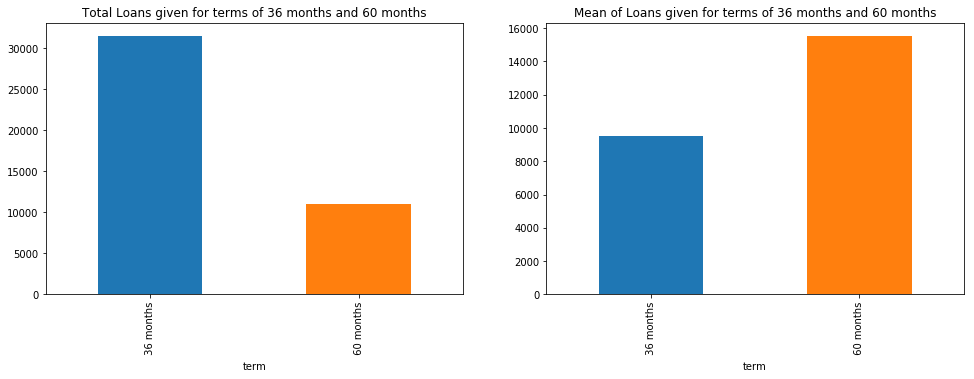

In [23]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
plt.subplots_adjust(right = 1.4)
term_loan_total['loan_amnt'].plot(ax = ax[0],kind = "bar")
ax[0].set_title("Total Loans given for terms of 36 months and 60 months")
term_loan_value['loan_amnt'].plot(ax = ax[1],kind = "bar")
ax[1].set_title("Mean of Loans given for terms of 36 months and 60 months")
plt.show()

### Number of short terms i.e 36 months loan is more than 60 months or long term loan
### But amount given for long term goals is on an average more than short term loan

# lets see what is the variation in trend of interest rate with loan amt and term


In [24]:
import re
reg = re.compile(r'(\d+\.?\d?)')
interest_rate = []
for interest in loan_copy.int_rate:
    val = reg.match(interest)
    
    interest_rate.append(float(val[0]))
loan_copy['interest_rate'] = interest_rate 
interest_amt_term = pd.pivot_table(loan_copy,index ='loan_amnt',columns='term',values='interest_rate')


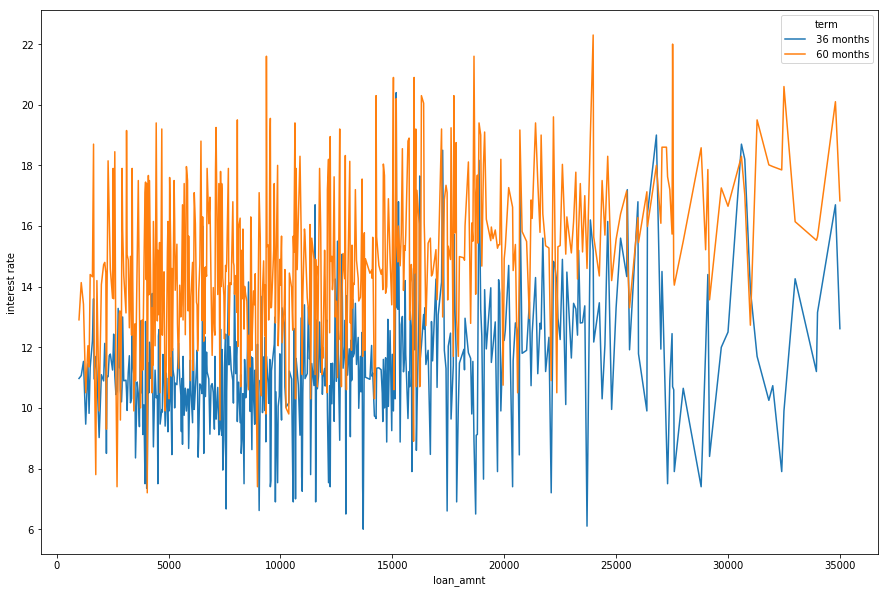

term,36 months,60 months
count,503.000000,503.000000
mean,11.306521,14.835663
std,2.138614,2.592488
min,6.000000,7.200000
25%,10.130682,13.300000
50%,11.191667,14.730769
75%,12.356190,16.300000
max,20.400000,22.300000


In [25]:
interest_amt_term.dropna(inplace=True)
interest_amt_term.plot(kind = 'line',figsize=(15,10))
plt.ylabel("interest rate")
plt.show()
interest_amt_term.describe()

## After analysing variation in interest rates
## It turns out that long term loans  have higher interest rate compared to short term loan interest rate

In [26]:
import seaborn as sns

### Lets have a look over loan amount by subcategories

In [27]:
loan_subcat = loan_copy.groupby('sub_grade').loan_amnt.sum()

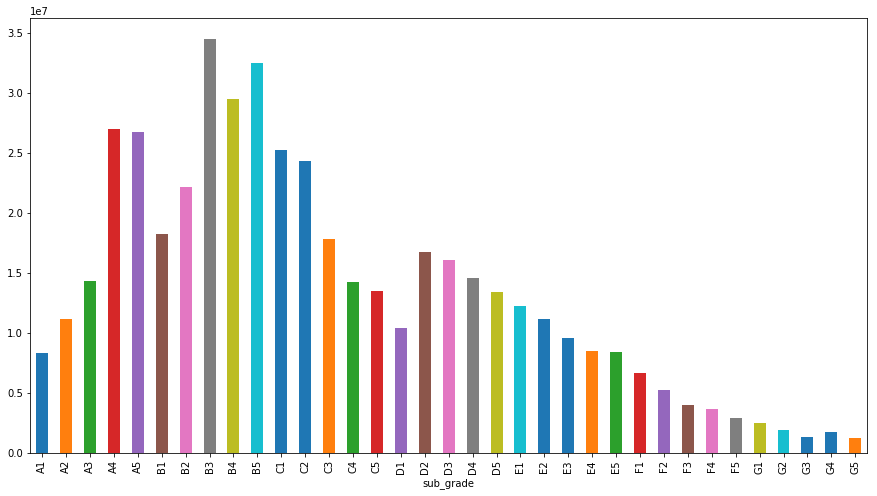

In [28]:
loan_subcat.plot(kind = 'bar',figsize=(15,8))

### As it turns out grade A,B,C and somewhat D are more likely to take loans , when it gets to grade E,F,G loan takers amount decreases drastically 

# Lets see how employment lenght affect loan takers on loan anount


In [29]:
reg = re.compile(r'(\d+\.?\d?)')
service_length = []
for emp in loan_copy.emp_length:
    value = reg.match(emp)
    service_length.append(float(value[0]) if value else 0)

In [30]:
loan_copy['emp'] = service_length
f = pd.value_counts(loan_copy['emp']).to_frame().reset_index()
f.columns = ['type','count']

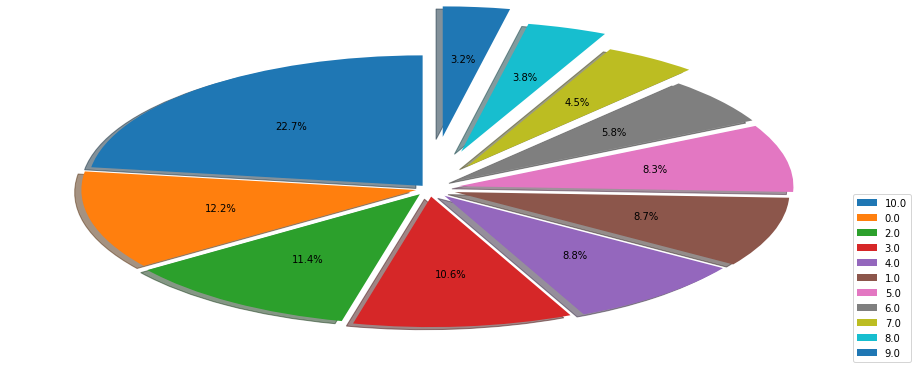

In [31]:
fig,ax = plt.subplots(figsize=(15,6))
explode = (0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4)
ax.pie(f['count'], labels = None, autopct='%1.1f%%', startangle=90, shadow = True,explode=explode)
ax.legend(bbox_to_anchor=(1,0.5), labels=f['type'])

### It turns out employees with lenth of job more than 10 years take max loan i.e 22.7% of total loans followed by 2, 3 years of employment

Below we have analysed how loan amount is affected by purpose of taking loan
=================================================================

In [32]:
loan_purpose = loan_copy.groupby('purpose').loan_amnt.count().reset_index()
loan_purpose

,purpose,loan_amnt
0,car,1615
1,credit_card,5477
2,debt_consolidation,19776
3,educational,422
4,home_improvement,3199
5,house,426
6,major_purchase,2311
7,medical,753
8,moving,629
9,other,4425


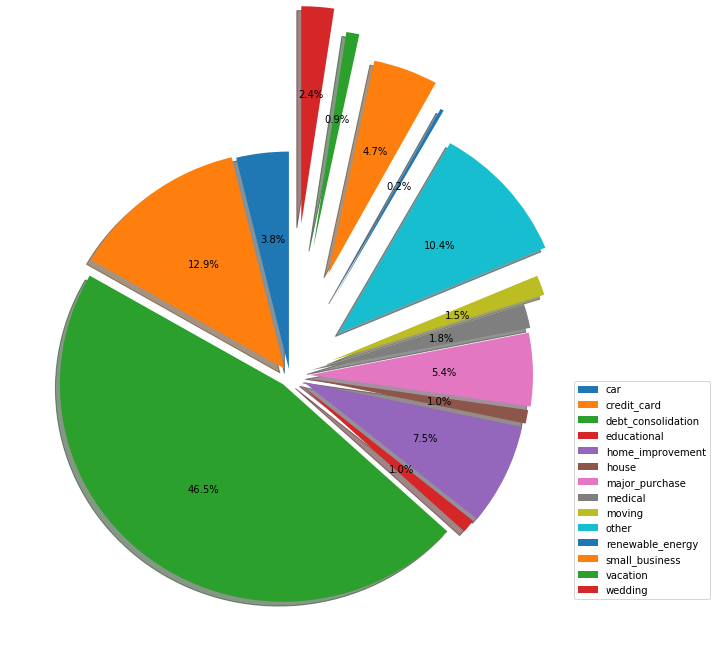

In [33]:
fig,ax = plt.subplots(figsize=(10,10))
explode = (0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7)
ax.pie(loan_purpose['loan_amnt'], labels = None, autopct='%1.1f%%', startangle=90, shadow = True,explode=explode)
ax.legend(bbox_to_anchor=(1,0.5), labels=loan_purpose['purpose'])

### It can be seen that most of the loans are taken for debt_consolidation, credit_card and home_improvement 

Below is analysis over loan amount dependence over Geo location (States of USA)
==============================================================

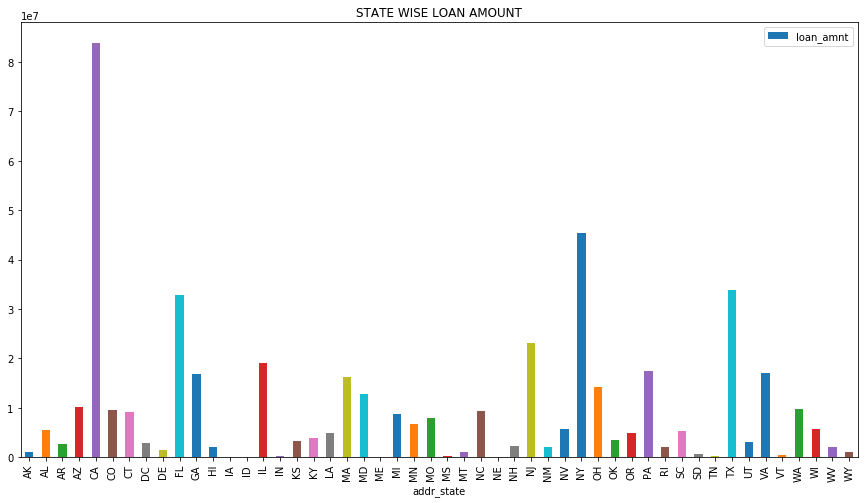

In [34]:
loan_state = loan_copy.groupby('addr_state').loan_amnt.sum().reset_index()
len(loan_state)
loan_state.plot(kind='bar',figsize=(15,8),x='addr_state',y='loan_amnt',title="STATE WISE LOAN AMOUNT")

### It is evident that CA has got more loan amount then any other state in USA